        date product  revenue  units_sold
0 2024-06-01  Tablet     1715           3
1 2024-06-02  Laptop     1455           7
2 2024-06-03  Tablet      776           4
3 2024-06-04  Tablet     1684           9
4 2024-06-05  Laptop      959           3
        date product  revenue  units_sold  total_to_date_revenue  \
0 2024-06-01  Tablet     1715           3                   1715   
1 2024-06-02  Laptop     1455           7                   3170   
2 2024-06-03  Tablet      776           4                   3946   
3 2024-06-04  Tablet     1684           9                   5630   
4 2024-06-05  Laptop      959           3                   6589   
5 2024-06-06  Laptop     1837           5                   8426   
6 2024-06-07  Tablet      521           3                   8947   
7 2024-06-08   Phone      752           7                   9699   
8 2024-06-09  Tablet     1247           5                  10946   
9 2024-06-10  Tablet     1356           9                  12302   


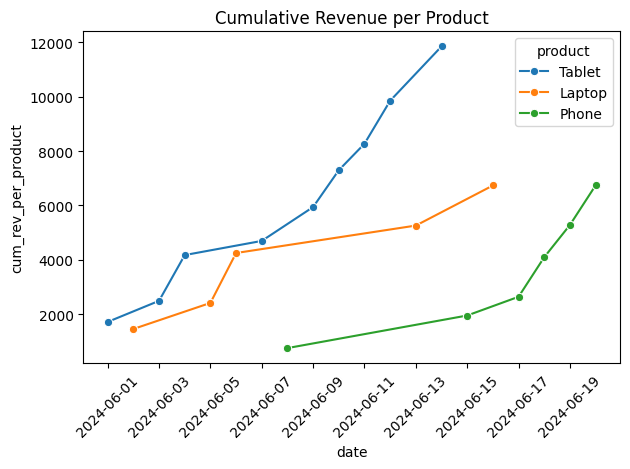

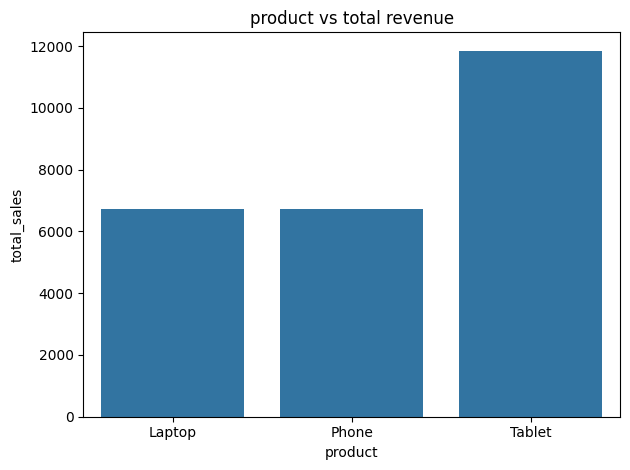

In [19]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range("2024-06-01", periods=20, freq="D")
sales = pd.DataFrame({
    "date": dates,
    "product": np.random.choice(["Laptop","Phone","Tablet"], size=20),
    "revenue": np.random.randint(500, 2000, size=20),
    "units_sold": np.random.randint(1, 10, size=20)
})
print(sales.head(5))

df = sales.copy()

df["total_to_date_revenue"] = df["revenue"].cumsum()
df["total_units_sold_per_product"] = df.groupby("product")["units_sold"].cumsum()
df["change"] = df.groupby("product")["revenue"].pct_change()
df["rolling_avg_7"] = (df
    .groupby("product")["revenue"]
    .transform(lambda s: s.rolling(window=7, min_periods=1).mean()))
df["cum_rev_per_product"] = df.groupby("product")["revenue"].cumsum()

print(df.head(10))

product_stats = (df.groupby("product")
                .agg(
                    average_revenue = ("revenue","mean"),
                    total_sales = ("revenue","sum"),
                    max_units_sold = ("units_sold", "sum")
                ))
print(product_stats)

growth_rate = df.groupby("product")["change"].mean().sort_values(ascending=False)
print(growth_rate)

import seaborn as sns
import matplotlib.pyplot as plt


sns.lineplot(data=df, x="date", y="cum_rev_per_product", hue="product", marker="o")
plt.title("Cumulative Revenue per Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.barplot(data=product_stats,x="product",y="total_sales")
plt.title("product vs total revenue")
plt.tight_layout()
plt.show()